In [2]:
# import necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV



In [4]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load campus recruitment data
df=pd.read_csv('/content/drive/MyDrive/Campus_Recruitment_Data.csv')

In [6]:
nrows,ncols=df.shape
print(f"Number of rows {nrows} \nNumber of columns {ncols}")

Number of rows 10000 
Number of columns 15


In [7]:
# print dataset

df.head()

Unnamed: 0  StudentId  CGPA  Major Projects  Workshops/Certificatios  \
0           0          1   7.5               1                        1   
1           1          2   8.9               0                        3   
2           2          3   7.3               1                        2   
3           3          4   7.5               1                        1   
4           4          5   8.3               1                        2   

   Mini Projects  Skills  Communication Skill Rating Internship Hackathon  \
0              1       6                         4.4         No        No   
1              2       9                         4.0        Yes       Yes   
2              2       8                         4.8        Yes        No   
3              2       8                         4.4        Yes       Yes   
4              2       8                         4.5        Yes       Yes   

   12th Percentage  10th Percentage  backlogs PlacementStatus   salary  
0               61               79         2       NotPlaced        0  
1               78               82         0          Placed  1000000  
2               79               80         2       NotPlaced        0  
3               81               80         0          Placed   950000  
4               74               88         0          Placed   950000

In [ ]:
# renameing and removing unnecessary columns
df.rename(columns={'Communication Skill Rating':'communi_rating','Workshops/Certificatios':'workshops'},inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [8]:
# checking for data type of columns in df
df.dtypes

Unnamed: 0                      int64
StudentId                       int64
CGPA                          float64
Major Projects                  int64
Workshops/Certificatios         int64
Mini Projects                   int64
Skills                          int64
Communication Skill Rating    float64
Internship                     object
Hackathon                      object
12th Percentage                 int64
10th Percentage                 int64
backlogs                        int64
PlacementStatus                object
salary                          int64
dtype: object

In [9]:
# statical summary of data
df.describe()

Unnamed: 0    StudentId          CGPA  Major Projects  \
count  10000.00000  10000.00000  10000.000000    10000.000000   
mean    4999.50000   5000.50000      7.698010        1.049200   
std     2886.89568   2886.89568      0.640131        0.665901   
min        0.00000      1.00000      6.500000        0.000000   
25%     2499.75000   2500.75000      7.400000        1.000000   
50%     4999.50000   5000.50000      7.700000        1.000000   
75%     7499.25000   7500.25000      8.200000        1.000000   
max     9999.00000  10000.00000      9.100000        2.000000   

       Workshops/Certificatios  Mini Projects        Skills  \
count             10000.000000   10000.000000  10000.000000   
mean                  2.026600       1.013200      7.555200   
std                   0.867968       0.904272      0.927922   
min                   0.000000       0.000000      6.000000   
25%                   1.000000       0.000000      7.000000   
50%                   2.000000       1.000000      8.000000   
75%                   3.000000       2.000000      8.000000   
max                   3.000000       3.000000      9.000000   

       Communication Skill Rating  12th Percentage  10th Percentage  \
count                10000.000000     10000.000000     10000.000000   
mean                     4.323960        69.159400        74.501500   
std                      0.411622        10.430459         8.919527   
min                      3.000000        55.000000        57.000000   
25%                      4.000000        59.000000        67.000000   
50%                      4.400000        70.000000        73.000000   
75%                      4.700000        78.000000        83.000000   
max                      4.800000        90.000000        88.000000   

          backlogs        salary  
count  10000.00000  1.000000e+04  
mean       1.73840  3.749350e+05  
std        1.39512  4.733645e+05  
min        0.00000  0.000000e+00  
25%        1.00000  0.000000e+00  
50%        1.00000  0.000000e+00  
75%        3.00000  9.000000e+05  
max        7.00000  1.300000e+06

In [10]:
# check Missing values
print("\nMissing Values Check:")
print(df.isnull().sum())


Missing Values Check:
Unnamed: 0                    0
StudentId                     0
CGPA                          0
Major Projects                0
Workshops/Certificatios       0
Mini Projects                 0
Skills                        0
Communication Skill Rating    0
Internship                    0
Hackathon                     0
12th Percentage               0
10th Percentage               0
backlogs                      0
PlacementStatus               0
salary                        0
dtype: int64


In [11]:
# Encoding categorical features
le = preprocessing.LabelEncoder()
df['Internship'] = le.fit_transform(df['Internship'])
df['Hackathon'] = le.fit_transform(df['Hackathon'])
df['PlacementStatus'] = le.fit_transform(df['PlacementStatus'])  # Placed=1, NotPlaced=0

In [12]:
df.head()

Unnamed: 0  StudentId  CGPA  Major Projects  Workshops/Certificatios  \
0           0          1   7.5               1                        1   
1           1          2   8.9               0                        3   
2           2          3   7.3               1                        2   
3           3          4   7.5               1                        1   
4           4          5   8.3               1                        2   

   Mini Projects  Skills  Communication Skill Rating  Internship  Hackathon  \
0              1       6                         4.4           0          0   
1              2       9                         4.0           1          1   
2              2       8                         4.8           1          0   
3              2       8                         4.4           1          1   
4              2       8                         4.5           1          1   

   12th Percentage  10th Percentage  backlogs  PlacementStatus   salary  
0               61               79         2                0        0  
1               78               82         0                1  1000000  
2               79               80         2                0        0  
3               81               80         0                1   950000  
4               74               88         0                1   950000

In [13]:
# check for duplicates
nduplicates=df.duplicated().sum()

if nduplicates>0:
  print("There are nduplicates rows in the dataset")
else:
  print("There are no duplicate rows in the dataset")

There are no duplicate rows in the dataset


In [14]:
# check unique values in each column
for i in df.columns:
    print(f"{i} : {df[i].unique()}")

Unnamed: 0 : [   0    1    2 ... 9997 9998 9999]
StudentId : [    1     2     3 ...  9998  9999 10000]
CGPA : [7.5 8.9 7.3 8.3 7.  7.7 6.5 7.8 7.9 7.4 8.6 8.2 6.8 7.6 6.7 8.4 8.5 6.9
 8.1 8.8 8.  6.6 7.2 7.1 8.7 9.  9.1]
Major Projects : [1 0 2]
Workshops/Certificatios : [1 3 2 0]
Mini Projects : [1 2 0 3]
Skills : [6 9 8 7]
Communication Skill Rating : [4.4 4.  4.8 4.5 4.2 3.5 3.9 4.6 4.1 4.7 3.4 3.8 4.3 3.6 3.3 3.2 3.7 3.
 3.1]
Internship : [0 1]
Hackathon : [0 1]
12th Percentage : [61 78 79 81 74 55 62 59 75 85 82 71 84 63 72 58 77 56 68 76 64 66 60 65
 80 70 57 86 90 73 69 83 87 67 88 89]
10th Percentage : [79 82 80 88 66 65 72 71 86 87 83 73 78 63 75 69 57 61 85 68 81 84 60 67
 64 76 70 62 74 59 58 77]
backlogs : [2 0 4 3 1 7 5 6]
PlacementStatus : [0 1]
salary : [      0 1000000  950000  450000 1250000  400000  750000  550000 1100000
  500000 1200000 1150000 1050000  900000 1300000  800000  700000  850000]


<Axes: ylabel='Frequency'>

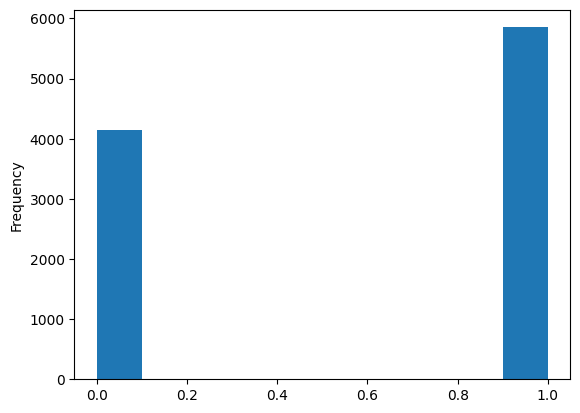

In [15]:
# Histogram of Internship
df["Internship"].plot(kind='hist')

<Axes: ylabel='Frequency'>

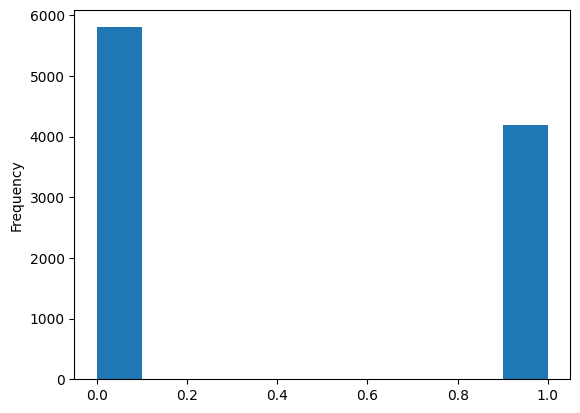

In [ ]:
df["PlacementStatus"].plot(kind='hist')
# ALmost 45% students are not placed

In [16]:
# checking for correlation between the features
df.corr()['PlacementStatus']

Unnamed: 0                    0.004294
StudentId                     0.004294
CGPA                          0.423131
Major Projects                0.260340
Workshops/Certificatios       0.475186
Mini Projects                 0.362268
Skills                        0.515559
Communication Skill Rating    0.427284
Internship                    0.482491
Hackathon                     0.323659
12th Percentage               0.469763
10th Percentage               0.505746
backlogs                     -0.751820
PlacementStatus               1.000000
salary                        0.931406
Name: PlacementStatus, dtype: float64

Factors Influencing Placement Status



Positive Correlates:

Skills, Internships, 10th Percentage, and Workshops: These factors exhibit a moderate positive correlation with placement status, suggesting that they positively influence a candidate's chances of securing a placement.
Salary: This factor demonstrates a strong positive correlation with placement status, indicating that higher salary offers are often associated with successful placements.
Negative Correlate:

Backlogs: Backlogs have a strong negative correlation with placement status, implying that a higher number of backlogs can significantly diminish placement prospects.
Moderate Correlates:

CGPA and Communication Rating: While these factors also have a moderate positive impact on placement, their influence is less pronounced compared to skills, internships, or workshops.
These findings underscore the importance of a well-rounded profile, encompassing both academic performance and practical experience, in securing desirable placements.

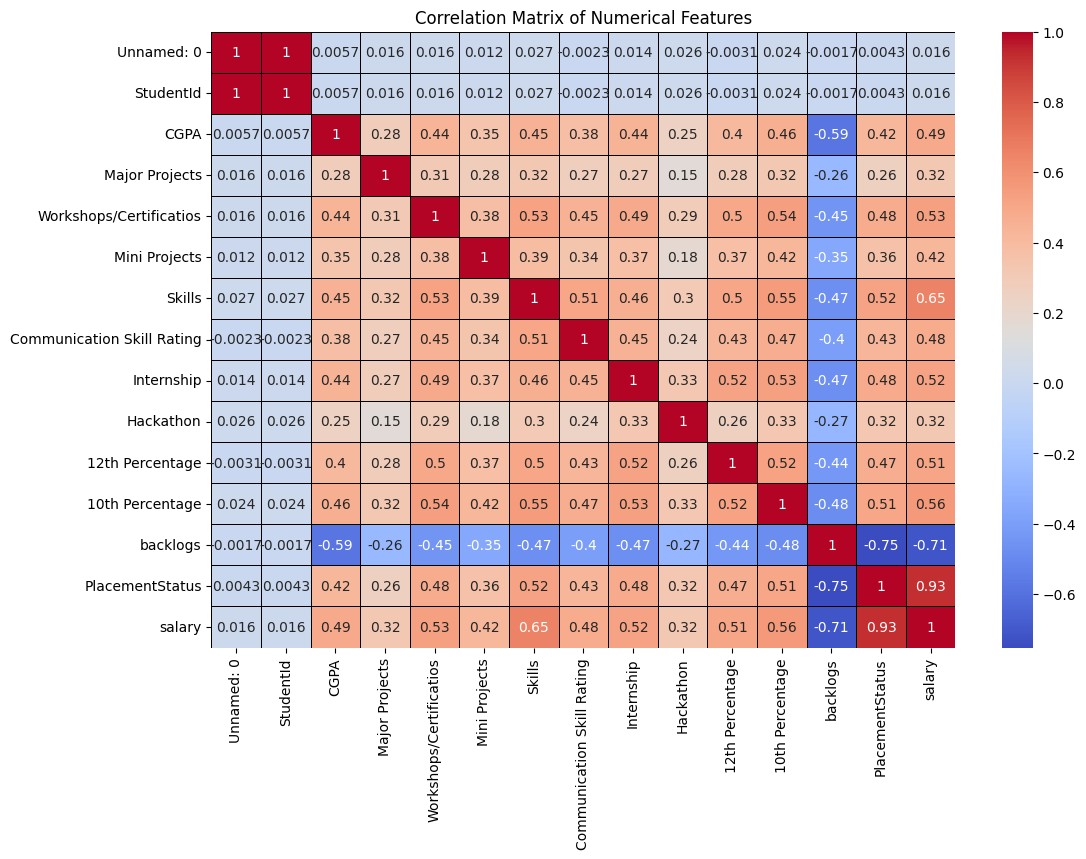

In [17]:
corr_matrix = df.corr()

# 2. Plot a correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

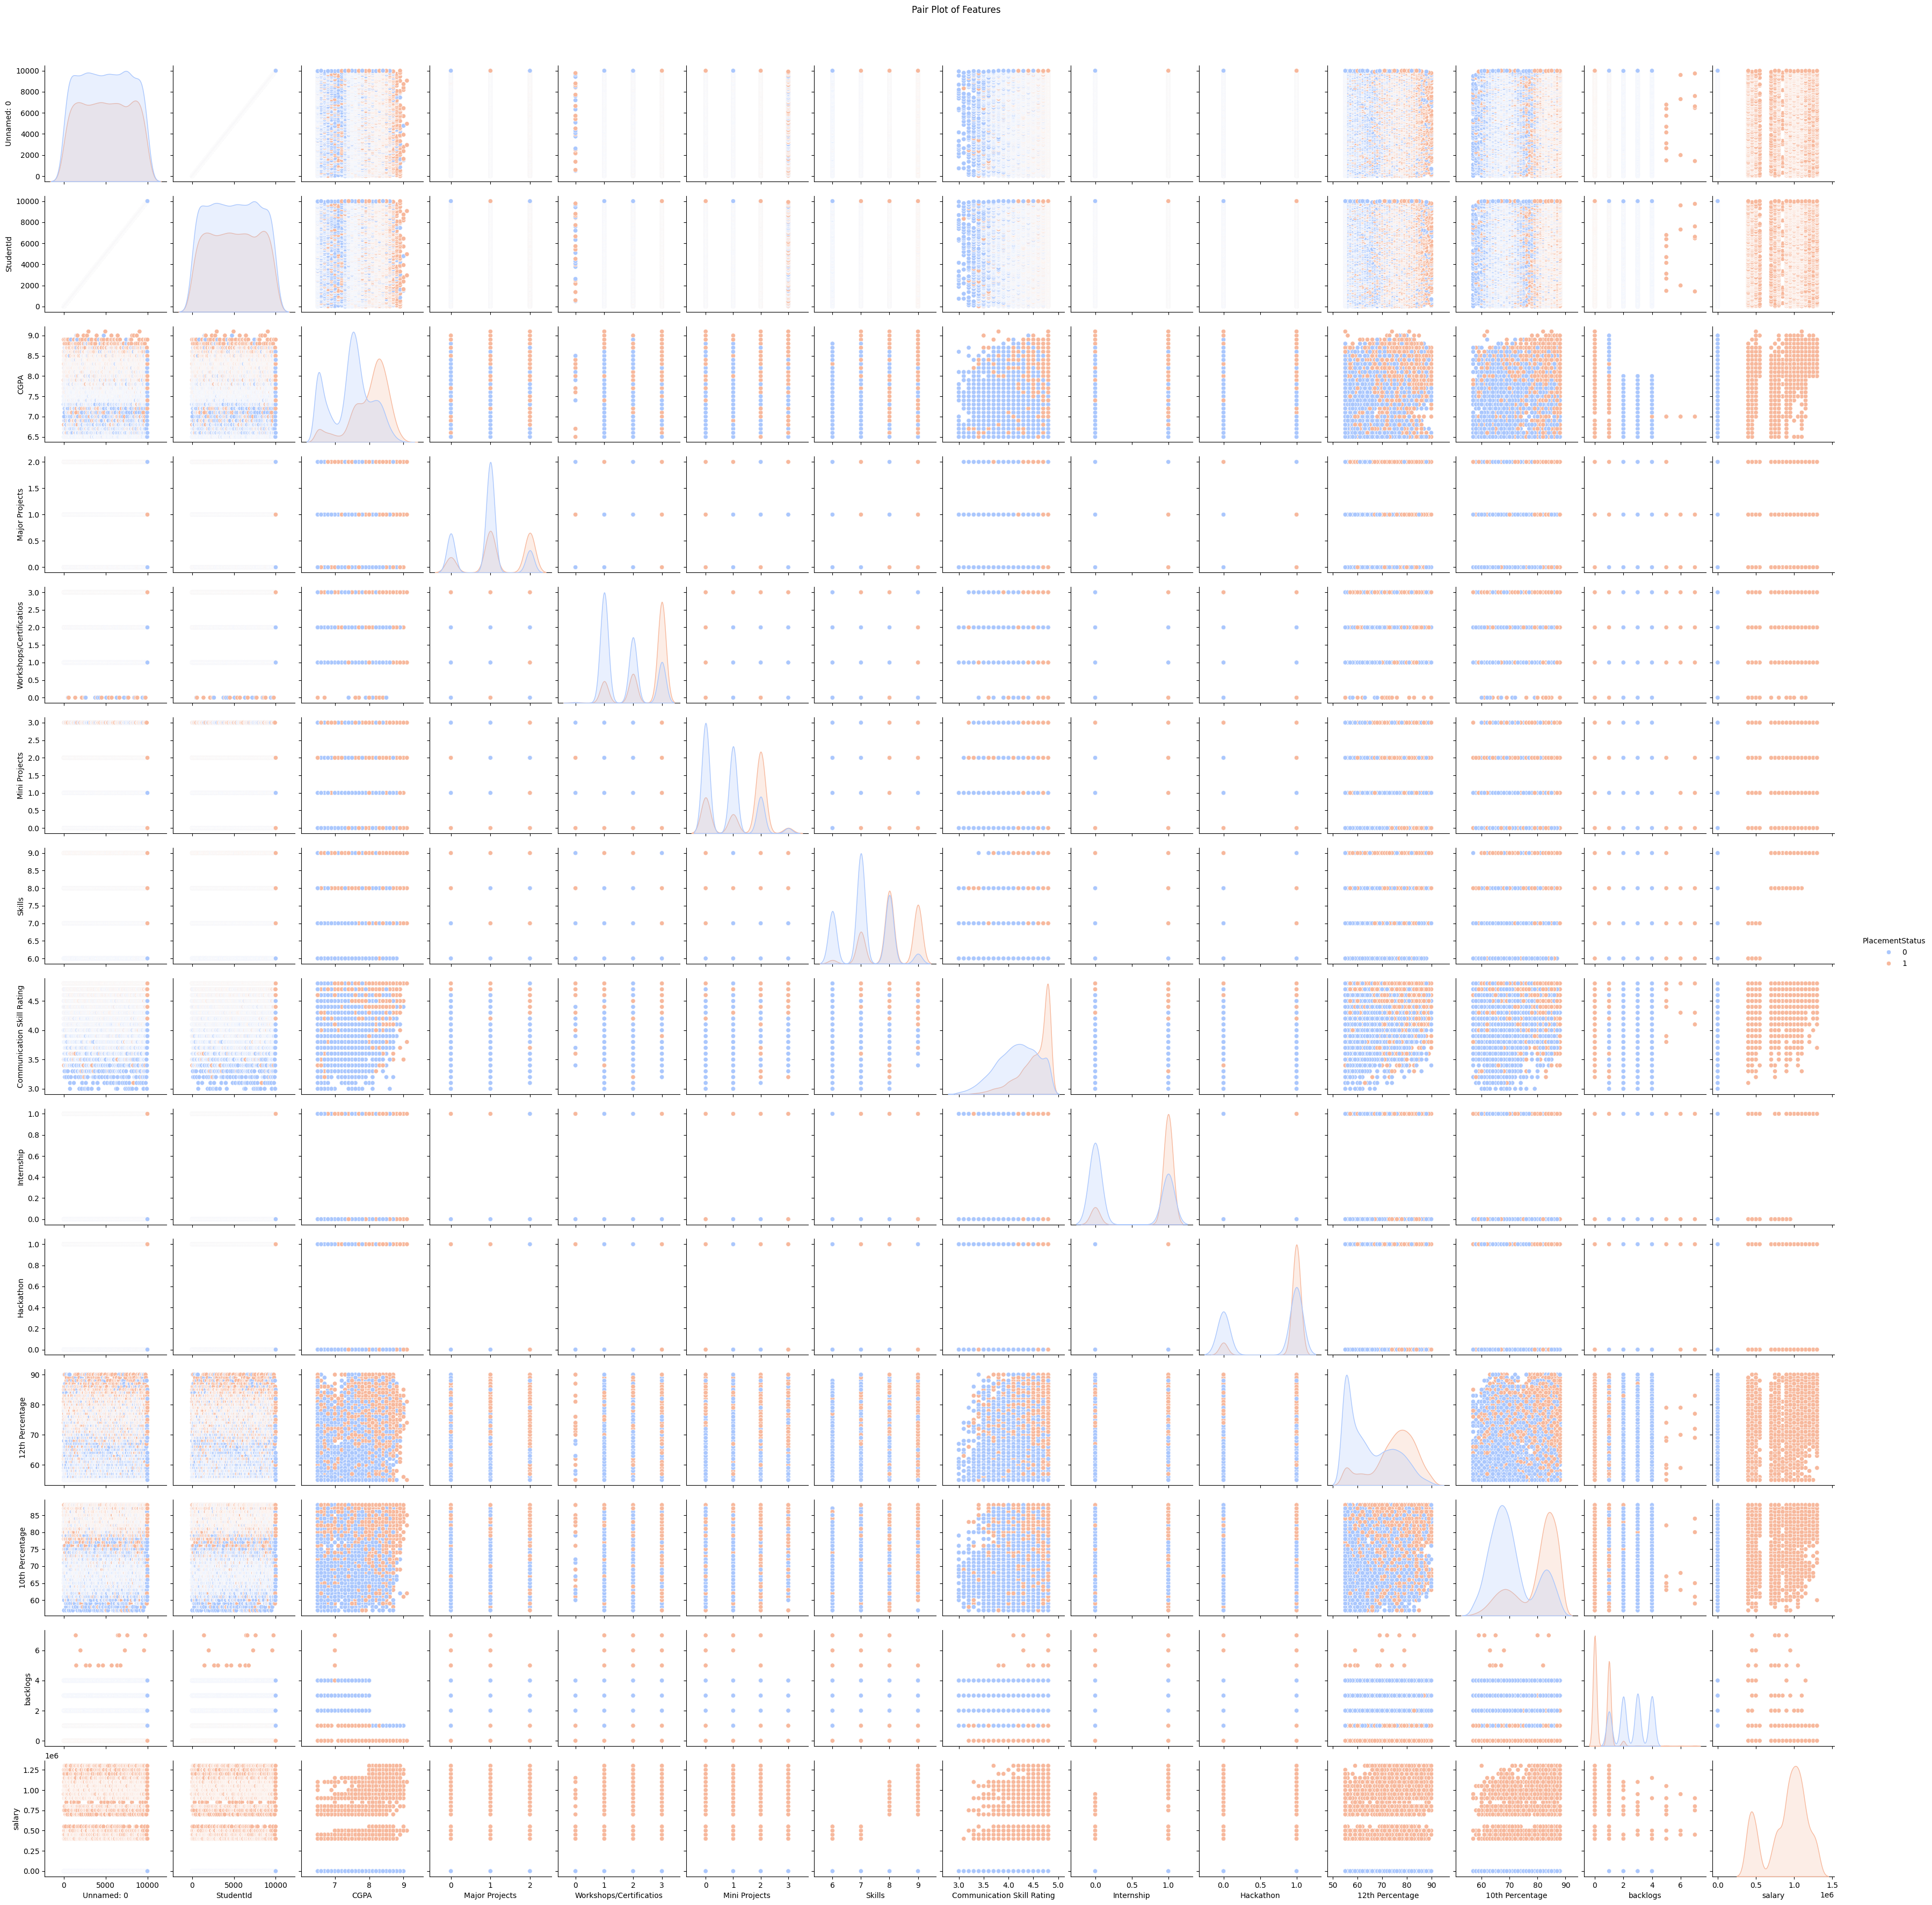

In [18]:
# pair plot for relationship of  each feature with the PlacementStatus
sns.pairplot(df, diag_kind='kde', hue='PlacementStatus', palette='coolwarm')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

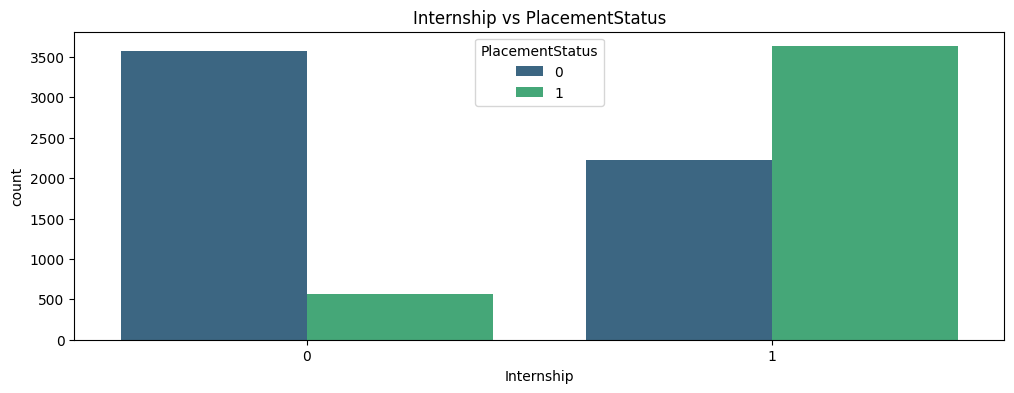

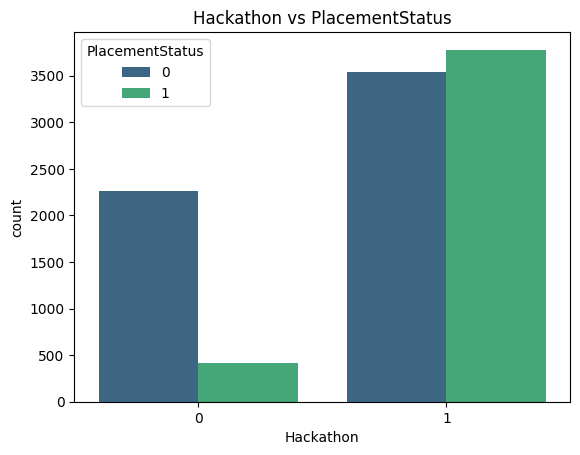

In [19]:
# Count plot for Internship vs PlacementStatus
plt.figure(figsize=(12, 4))
sns.countplot(x='Internship', hue='PlacementStatus', data=df, palette='viridis')
plt.title('Internship vs PlacementStatus')
plt.show()

# Count plot for Hackathon vs PlacementStatus
sns.countplot(x='Hackathon', hue='PlacementStatus', data=df, palette='viridis')
plt.title('Hackathon vs PlacementStatus')
plt.show()


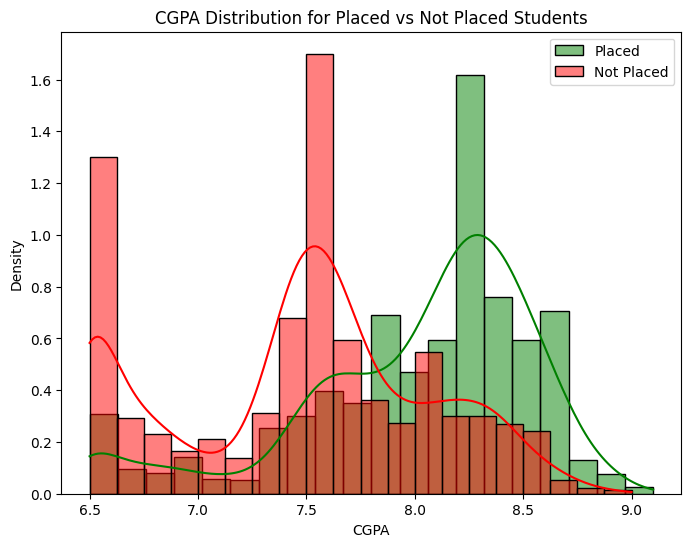

In [20]:
# Distribution of CGPA for students got  Placed vs Not Placed
plt.figure(figsize=(8, 6))
sns.histplot(df[df['PlacementStatus'] == 1]['CGPA'], label='Placed', color='green', kde=True, stat="density", bins=20)
sns.histplot(df[df['PlacementStatus'] == 0]['CGPA'], label='Not Placed', color='red', kde=True, stat="density", bins=20)
plt.title('CGPA Distribution for Placed vs Not Placed Students')
plt.legend()
plt.show()


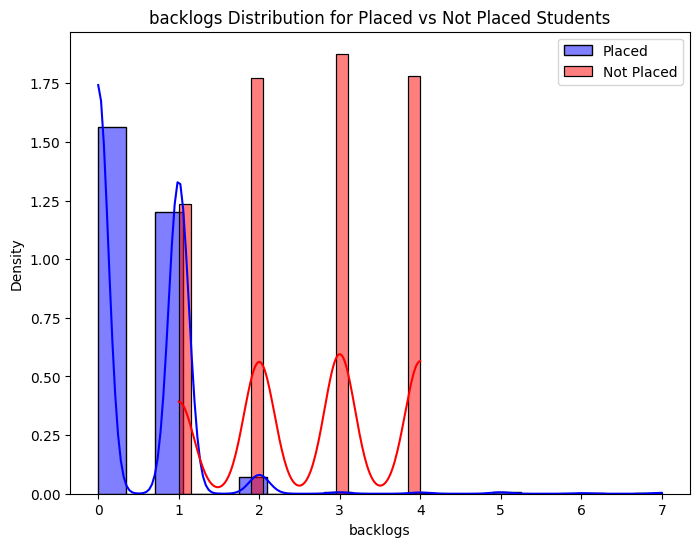

In [21]:
# Distribution of  backlogs for students got Placed vs Not Placed
plt.figure(figsize=(8, 6))
sns.histplot(df[df['PlacementStatus'] == 1]['backlogs'], label='Placed', color='blue', kde=True, stat="density", bins=20)
sns.histplot(df[df['PlacementStatus'] == 0]['backlogs'], label='Not Placed', color='red', kde=True, stat="density", bins=20)
plt.title('backlogs Distribution for Placed vs Not Placed Students')
plt.legend()
plt.show()


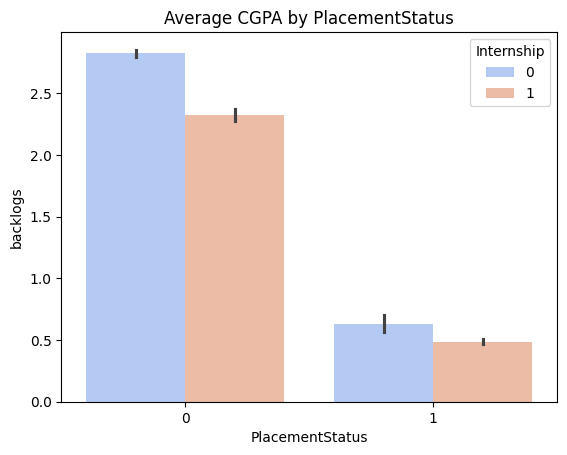

In [25]:
# Bar plot for average CGPA of placed vs not placed students
sns.barplot(x='PlacementStatus', y='backlogs',hue ='Internship', data=df, palette='coolwarm')
plt.title('Average CGPA by PlacementStatus')
plt.show()

**Backlog** is the most influential factor for the placement.

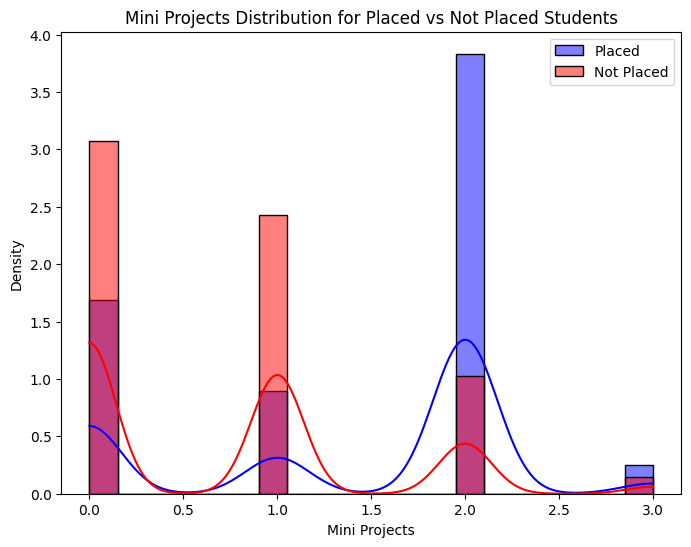

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['PlacementStatus'] == 1]['Mini Projects'], label='Placed', color='blue', kde=True, stat="density", bins=20)
sns.histplot(df[df['PlacementStatus'] == 0]['Mini Projects'], label='Not Placed', color='red', kde=True, stat="density", bins=20)
plt.title('Mini Projects Distribution for Placed vs Not Placed Students')
plt.legend()
plt.show()

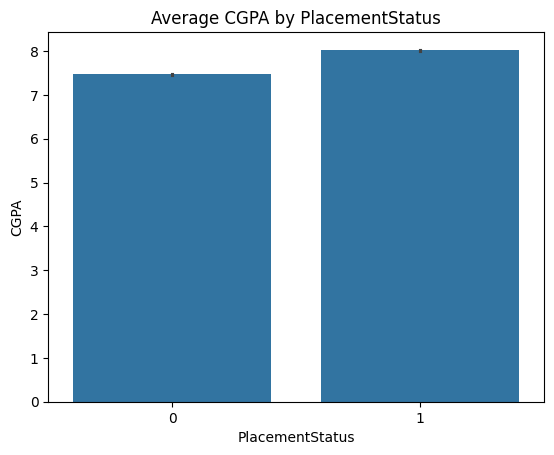

In [28]:
# Bar plot for average CGPA for placed vs not placed students
sns.barplot(x='PlacementStatus', y='CGPA', data=df)
plt.title('Average CGPA by PlacementStatus')
plt.show()

<ipython-input-29-8e7656c2579b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlacementStatus', y='Hackathon', data=df, palette='coolwarm')


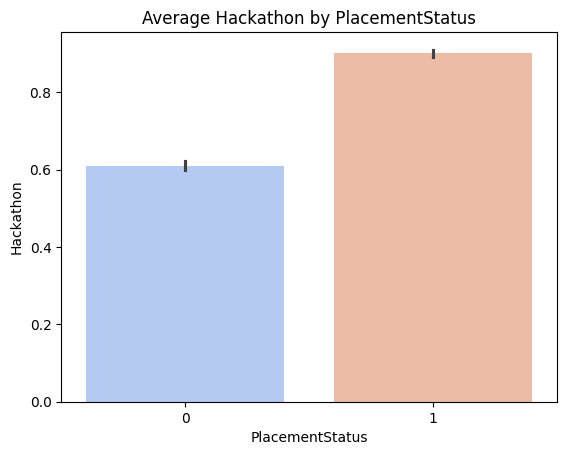

In [29]:
sns.barplot(x='PlacementStatus', y='Hackathon', data=df, palette='coolwarm')
plt.title('Average Hackathon by PlacementStatus')
plt.show()

<ipython-input-156-7eb6435fb4c3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlacementStatus', y='Internship', data=df, palette='coolwarm')


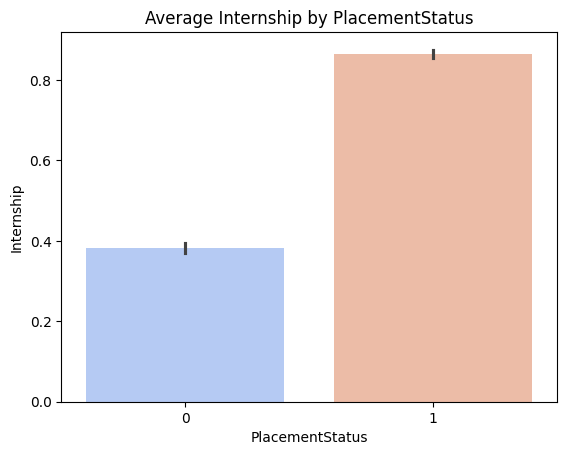

In [ ]:
sns.barplot(x='PlacementStatus', y='Internship', data=df, palette='coolwarm')
plt.title('Average Internship by PlacementStatus')
plt.show()

In [30]:
# Dropping irrelevant columns from X
x=df.drop(['StudentId','PlacementStatus','salary'],axis=1)

In [31]:
x.shape

(10000, 12)

In [32]:
y = df['PlacementStatus']

In [33]:
y

0       0
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: PlacementStatus, Length: 10000, dtype: int64

In [35]:
# split data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Hyperparameter tuning, cross validation and model evaluation

In [36]:
# parameters for random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# parameters for Decision tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# parameters for KNeighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


In [37]:
# Initialize the models
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [38]:
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1)
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=1)

In [39]:
grid_rf.fit(x_train, y_train)
ypred=grid_rf.predict(x_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [40]:
grid_dt.fit(x_train, y_train)
ypred=grid_dt.predict(x_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [41]:
grid_knn.fit(x_train, y_train)
ypred=grid_knn.predict(x_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [42]:
# Printing best parameters
print("Best parameters for Random Forest: ", grid_rf.best_params_)
print("Best parameters for DecisionTreeClassifiert: ", grid_dt.best_params_)
print("Best parameters for KNeighborsClassifier: ", grid_knn.best_params_)

Best parameters for Random Forest:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for DecisionTreeClassifiert:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best parameters for KNeighborsClassifier:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [60]:
# Using best estimators for final classification
rf_best = grid_rf.best_estimator_
dt_best = grid_dt.best_estimator_
knn_best = grid_knn.best_estimator_


In [61]:
# Classification using best parameters of RFC
classify = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
classify.fit(x_train, y_train)
y_pred=classify.predict(x_test)

In [62]:
ypred

array([0, 0, 0, ..., 1, 1, 0])

In [63]:
accuracy_score=metrics.accuracy_score(y_test,ypred)

In [64]:
accuracy_score

0.7583333333333333

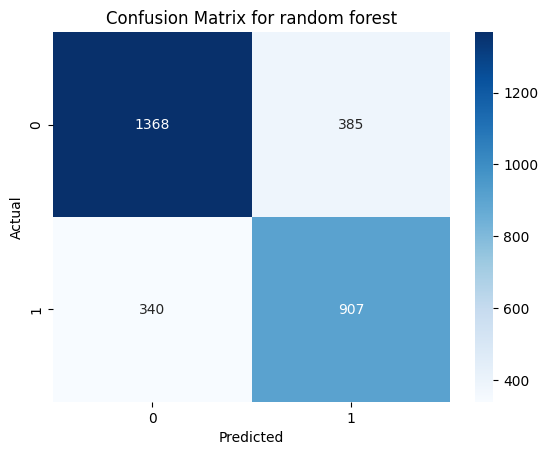

In [65]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for random forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**True Negatives (TN)** = 1530
The model correctly predicted 1530 instances as Negative (when they were actually Negative).

**False Positives (FP)** = 244
The model incorrectly predicted 244 instances as Positive (when they were actually Negative). This is also known as a Type I error.

**False Negatives (FN)** = 96
The model incorrectly predicted 96 instances as Negative (when they were actually Positive). This is also known as a Type II error.

**True Positives (TP)** = 1130
The model correctly predicted 1130 instances as Positive (when they were actually Positive).

In [66]:
classification_report=metrics.classification_report(y_test,ypred,output_dict=True)

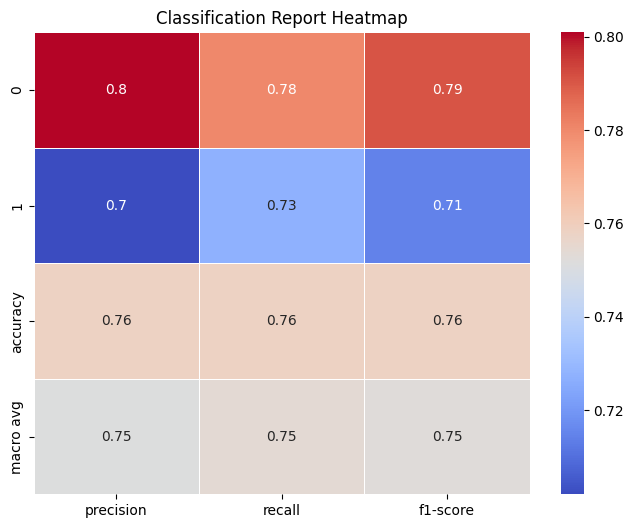

In [67]:
report_df = pd.DataFrame(classification_report).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

In [68]:
# classification_report
accuracy = classification_report['accuracy']  # Overall accuracy
precision = classification_report['weighted avg']['precision']  # Weighted precision
recall = classification_report['weighted avg']['recall']  # Weighted recall
f1_score = classification_report['weighted avg']['f1-score']  # Weighted F1-score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.7583333333333333
Precision: 0.7598171990970677
Recall: 0.7583333333333333
F1-Score: 0.758903846787761


In [69]:
importances = RandomForestClassifier.feature_importances_

In [70]:
ypred_pob=classify.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, ypred_pob)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9849079890996807

In [71]:
ypred_pob

array([0.00299945, 0.05297918, 0.00311239, ..., 0.99012016, 0.9230544 ,
       0.00400687])

In [72]:
roc_auc = metrics.auc(fpr,tpr)
roc_auc

0.9849079890996807

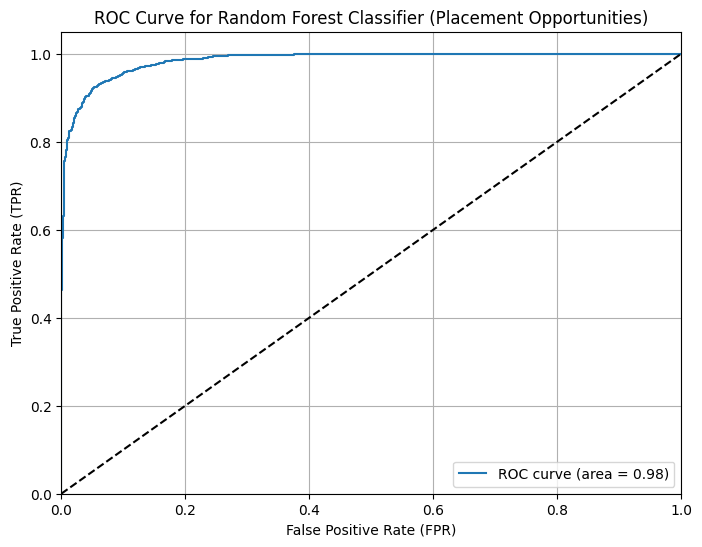

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %roc_auc )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Classifier (Placement Opportunities)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [74]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors= 5, weights='distance')

In [75]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [76]:
ypred=knn.predict(x_test)

In [77]:
ypred

array([0, 0, 0, ..., 1, 1, 0])

In [78]:
accuracy_score=metrics.accuracy_score(y_test,ypred)

In [79]:
accuracy_score

0.754

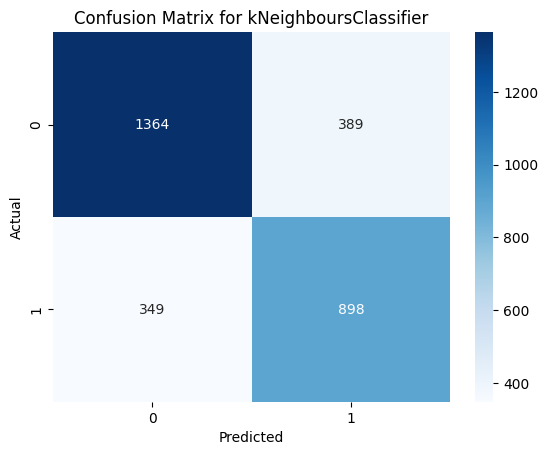

In [82]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for kNeighboursClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [83]:
classification_report=metrics.classification_report(y_test,ypred,output_dict=True)

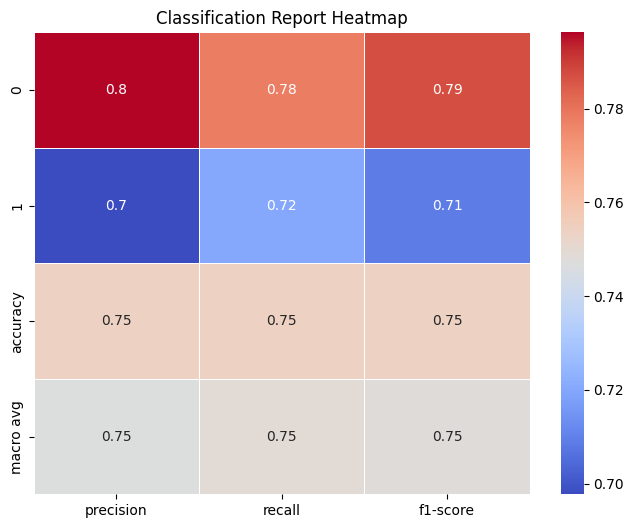

In [84]:
report_df = pd.DataFrame(classification_report).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

In [85]:
# classification_report of K-nearest neighbours
accuracy = classification_report['accuracy']  # Overall accuracy
precision = classification_report['weighted avg']['precision']  # Weighted precision
recall = classification_report['weighted avg']['recall']  # Weighted recall
f1_score = classification_report['weighted avg']['f1-score']  # Weighted F1-score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.754
Precision: 0.7553135622242453
Recall: 0.754
F1-Score: 0.7545220905665637


In [86]:
# Classifying with best parameters of Decision tree classifier
clf=DecisionTreeClassifier(criterion='gini', max_depth= 10, min_samples_leaf= 4, min_samples_split= 10)

In [87]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [88]:
ypred=clf.predict(x_test)

In [89]:
accuracy_score=metrics.accuracy_score(y_test,ypred)

In [90]:
accuracy_score

0.9193333333333333

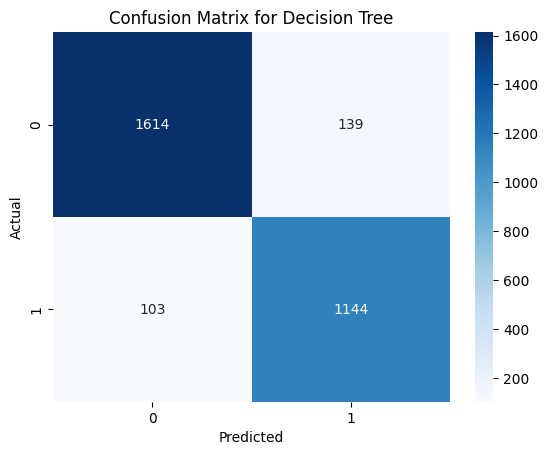

In [92]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [93]:
classification_report=metrics.classification_report(y_test,ypred,output_dict=True)

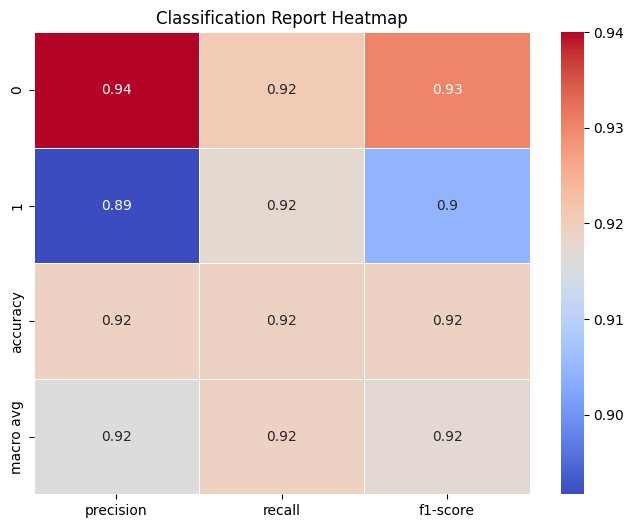

In [94]:
report_df = pd.DataFrame(classification_report).transpose()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()

In [95]:
# classification_report of Decision Tree Classifier
accuracy = classification_report['accuracy']  # Overall accuracy
precision = classification_report['weighted avg']['precision']  # Weighted precision
recall = classification_report['weighted avg']['recall']  # Weighted recall
f1_score = classification_report['weighted avg']['f1-score']  # Weighted F1-score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.9193333333333333
Precision: 0.9199135510543398
Recall: 0.9193333333333333
F1-Score: 0.919488802572777



 # Voting Classifier using Random Forest, Decision Tree and K-nearest neighbours

In [96]:
# hard voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_best),
    ('dt', dt_best),
    ('knn', knn_best)], voting='hard')

In [97]:
# training the Voting Classifier
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=2)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_leaf=4,
                                                     min_samples_split=5)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=9,
                                                   weights='distance'))])

In [98]:
# make classifications
ypred_voting = voting_clf.predict(x_test)

In [99]:
ypred_voting

array([0, 0, 0, ..., 1, 1, 0])

In [100]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    1
       ..
8014    0
1074    1
3063    1
6487    1
4705    0
Name: PlacementStatus, Length: 3000, dtype: int64

In [101]:
#  accuracy score of the Voting Classifier
voting_accuracy = metrics.accuracy_score(y_test, ypred_voting)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

Voting Classifier Accuracy: 0.9276666666666666


In [102]:
classification_report_voting = metrics.classification_report(y_test, ypred_voting)
print("Classification Report for Voting Classifier:\n", metrics.classification_report(y_test, ypred_voting))

Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1753
           1       0.89      0.94      0.92      1247

    accuracy                           0.93      3000
   macro avg       0.92      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



In [103]:
# confusion matrix for Voting Classifier
confusion_voting = metrics.confusion_matrix(y_test, ypred_voting)
print(f"Confusion Matrix for Voting Classifier:\n {confusion_voting}")

Confusion Matrix for Voting Classifier:
 [[1613  140]
 [  77 1170]]


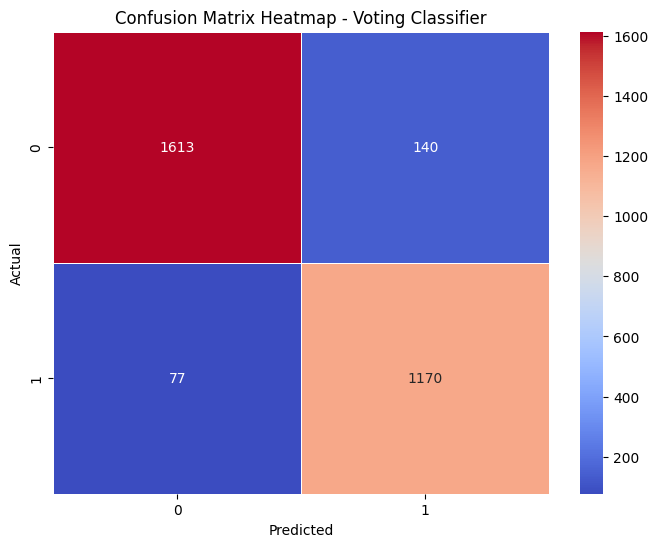

In [104]:
# plotting Confusion Matrix heatmap for Voting Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_voting, annot=True, cmap="coolwarm", fmt='d', linewidths=0.5)
plt.title('Confusion Matrix Heatmap - Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [106]:
# comparing  performance with individual models
print(f"Random Forest Accuracy: {metrics.accuracy_score(y_test, rf_best.predict(x_test))}")
print(f"Decision Tree Accuracy: {metrics.accuracy_score(y_test, dt_best.predict(x_test))}")
print(f"KNN Accuracy: {metrics.accuracy_score(y_test, knn_best.predict(x_test))}")
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# classification reports for individual models models
print("Random Forest Classification Report:\n", metrics.classification_report(y_test, rf_best.predict(x_test)))
print("Decision Tree Classification Report:\n", metrics.classification_report(y_test, dt_best.predict(x_test)))
print("KNN Classification Report:\n", metrics.classification_report(y_test, knn_best.predict(x_test)))

Random Forest Accuracy: 0.9306666666666666
Decision Tree Accuracy: 0.9206666666666666
KNN Accuracy: 0.7583333333333333
Voting Classifier Accuracy: 0.9276666666666666
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1753
           1       0.90      0.93      0.92      1247

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1753
           1       0.89      0.92      0.91      1247

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.